In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [69]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [70]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df.shape

(42000, 785)

In [72]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38584,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
import matplotlib.pyplot as plt

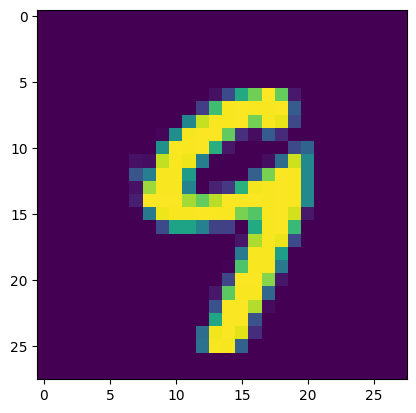

In [74]:
plt.imshow(df.iloc[32735,1:].values.reshape(28,28))

In [75]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn=KNeighborsClassifier()

In [80]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
y_pred=knn.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
accuracy_score(y_pred,y_test)

0.9648809523809524

# Now will use pca and try to reduce the colummn

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler=StandardScaler()

In [86]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## PCA 

In [108]:
from sklearn.decomposition import PCA

In [109]:
pca=PCA(n_components=300)

In [110]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [111]:
X_train.shape

(33600, 784)

In [112]:
X_train_trf.shape

(33600, 300)

In [113]:
knn=KNeighborsClassifier()

In [114]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [116]:
y_pred=knn.predict(X_test_trf)

In [117]:
accuracy_score(y_pred,y_test)

0.9467857142857142

In [118]:
for i in range(1,785):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred=knn.predict(X_test_trf)
    print(accuracy_score(y_pred,y_test))

0.25857142857142856
0.3238095238095238
0.5105952380952381
0.6660714285714285
0.7380952380952381
0.8228571428571428
0.8430952380952381
0.871904761904762
0.8860714285714286
0.9047619047619048
0.9108333333333334
0.9184523809523809
0.9278571428571428
0.9360714285714286
0.9389285714285714
0.9373809523809524
0.9398809523809524
0.940952380952381
0.9423809523809524
0.9439285714285715
0.9441666666666667
0.9432142857142857
0.9444047619047619
0.9448809523809524
0.9471428571428572
0.9478571428571428
0.9476190476190476
0.9467857142857142
0.9488095238095238
0.9501190476190476
0.9507142857142857
0.9519047619047619
0.9513095238095238
0.950595238095238


KeyboardInterrupt: 